<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 1 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

In [21]:
!python -m spacy download en_core_web_md

     |████████████████████████████████| 96.4 MB 1.1 MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-py3-none-any.whl size=98051302 sha256=6eead34a50bccb1cac84bb383b463e560e672fabd0b7d2604f110e003ea6fa02
  Stored in directory: /tmp/pip-ephem-wheel-cache-ywavgldr/wheels/69/c5/b8/4f1c029d89238734311b3269762ab2ee325a42da2ce8edb997
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [6]:
nlp = spacy.load('en_core_web_md')

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. However, the text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [42]:
##### Your Code Here #####
df = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module2-vector-representations/data/job_listings.csv',
                 index_col=0)
                
df['description'] = df.description.apply(
    lambda x : BeautifulSoup(x, 'html.parser').get_text()[2:-1].replace('\\n', ' ').replace('\\', ' '))

In [43]:
df.head()

,description,title
0,Job Requirements: Conceptual understanding in ...,Data scientist
1,"Job Description As a Data Scientist 1, you wi...",Data Scientist I
2,As a Data Scientist you will be working on con...,Data Scientist - Entry Level
3,"$4,969 - $6,756 a monthContractUnder the gener...",Data Scientist
4,Location: USA xe2 x80 x93 multiple locations ...,Data Scientist


## 2) Use Spacy to tokenize the listings 

In [20]:
def tokenize(document):
  doc = nlp(document)

  return [token.lemma_.strip() for token in doc if (
      not token.is_stop and not token.is_punct and token.lemma_.strip() != ''
  )]

In [21]:
##### Your Code Here #####
df['token'] = df['description'].apply(tokenize)

In [22]:
df.head()

,description,title,token
0,Job Requirements: Conceptual understanding in ...,Data scientist,"[job, requirement, conceptual, understanding, ..."
1,"Job Description As a Data Scientist 1, you wi...",Data Scientist I,"[job, description, Data, Scientist, 1, help, b..."
2,As a Data Scientist you will be working on con...,Data Scientist - Entry Level,"[Data, Scientist, work, consult, business, res..."
3,"$4,969 - $6,756 a monthContractUnder the gener...",Data Scientist,"[$, 4,969, $, 6,756, monthcontractunder, gener..."
4,Location: USA \xe2\x80\x93 multiple locations ...,Data Scientist,"[location, USA, \xe2\x80\x93, multiple, locati..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing

In [23]:
##### Your Code Here #####
vect = CountVectorizer()
vect.fit(df['description'])
dtm = vect.transform(df['description'])
dtm

<426x8756 sparse matrix of type '<class 'numpy.int64'>'
	with 112357 stored elements in Compressed Sparse Row format>

In [25]:
print(len(vect.get_feature_names()))
print(vect.get_feature_names())

8756
['00', '000', '02115', '03', '0305', '0356', '04', '062', '06366', '08', '10', '100', '1000', '1001', '1008', '100k', '100x', '1026036', '105', '1079302', '1082692', '10b', '10ms', '10x', '11', '110k', '112', '114157802', '12', '120', '125', '126', '130', '1315', '1324b', '138', '14', '140', '15', '150', '15000', '159m', '16', '1605', '165', '169334br', '17', '170', '17b', '18', '180', '180008jq', '18b', '19', '190', '190007ji', '19000bn4', '19000c1k', '19004162', '1901744', '1904', '1904labs', '1905', '19050', '1938', '1944', '1967', '1971', '1975', '1979', '1988', '199', '1994', '1999', '1b', '1st', '1strategy', '1tb', '20', '200', '2000', '200020183', '200041695', '2004', '2008', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2050', '21', '210', '2145', '2272', '24', '24m', '25', '250', '25256', '26', '260', '27', '28', '2nd', '2x', '30', '300', '30328', '30bn', '30k', '31', '317', '320', '3201', '33', '33051', '338', '35', '350', '3535', '35mi

In [26]:
from scipy import sparse

In [28]:
dtm

<426x8756 sparse matrix of type '<class 'numpy.int64'>'
	with 112357 stored elements in Compressed Sparse Row format>

In [30]:
dtm_dense_matrix = dtm.todense()
dtm_dense_matrix

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 2, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0]])

In [31]:
dtm_new = pd.DataFrame(dtm_dense_matrix, columns=vect.get_feature_names())
dtm_new.head()

,00,000,02115,03,0305,0356,04,062,06366,08,10,100,1000,1001,1008,100k,100x,1026036,105,1079302,1082692,10b,10ms,10x,11,110k,112,114157802,12,120,125,126,130,1315,1324b,138,14,140,15,150,...,xgboost,xp,xpo,yards,year,yeara,yearas,yearcollects,yeardescription,yearjob,yearlrs,years,yearsexperience,yearsummary,yearthe,yeartitle,yearworking,yes,yet,yeti,yield,york,you,young,your,yours,yourself,youtube,yrs,zenreach,zero,zeus,zf,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [32]:
import seaborn as sns

In [33]:
##### Your Code Here #####
doc_len = [len(doc) for doc in df['description']]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


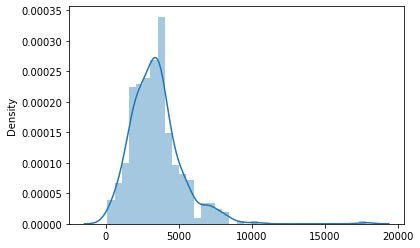

In [34]:
sns.distplot(doc_len)

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [35]:
##### Your Code Here #####
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
dtm = tfidf.fit_transform(df['description'])
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

In [36]:
dtm.head()

,00,000,04,10,100,1000,1079302,11,12,125,14,15,150,17,18,180,19,1strategy,20,200,2012,2013,2015,2017,2018,2019,2020,24,25,30,300,30328,35,36,3rd,3x,40,400,401,401k,...,x94we,x98,x98big,x99,x99d,x99ll,x99re,x99s,x99t,x99ve,x9c,x9cbig,x9d,xa0,xa2,xa6,xa7,xac,xae,xb7,xbb,xc2,xc3,xe2,xef,xgboost,xpo,year,years,yearthe,yes,yeti,york,young,yrs,zenreach,zeus,zf,zillow,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.137367,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.07555,0.0,0.0,0.081643,0.042661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111196,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.144229,0.0,0.0,0.0,0.041762,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.057505,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.099394,0.0,0.0,0.0,0.000000,0.10782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
tfidf = TfidfVectorizer(
    ngram_range=(1,2),
    max_df=97,
    min_df=.03,
    tokenizer=tokenize,
    max_features=5000
)
dtm = tfidf.fit_transform(df['description'])
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

In [45]:
dtm.head()

,$,1,1 year,10,100,12,2 +,2 year,2019,3 +,3 5,3 year,3rd,4,4 year,40,401(k,401k,5,5 +,5 year,500,6,600,600 city,7,7 year,8,ability build,ability communicate,ability develop,ability effectively,ability work,ability write,able,able work,academic,accelerate,accept,access,...,world welcome,world xe2,worldwide,write communication,writing,written,written verbal,x80 x93,x80 x94,x80 x94we,x80 x99ll,x80 x99re,x80 x99ve,x80 x9d,x80 xa6,x93,x94,x94we,x99 experience,x99 t,x99ll,x99ll need,x99ll work,x99re,x99re look,x99s degree,x99s large,x99s world,x99ve,x9d,xa6,xc2,year hand,year industry,year professional,year relevant,year work,year xe2,york,york city
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.155938,0.0,0.0,0.0,0.184959,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.170025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.114645,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.067891,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.073135,0.054934,0.0,0.000000,0.0,0.0,0.0,0.107396,0.0,0.0,0.148049,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.107396,0.0,0.047866,0.0,0.0,0.0,0.0,0.146271,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.320649,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.064071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.103519,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.247446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.213034,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.213034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings

In [46]:
from sklearn.neighbors import NearestNeighbors

In [47]:
##### Your Code Here #####
nn = NearestNeighbors(n_neighbors=6, algorithm='kd_tree')
nn.fit(dtm)

doc_index = 0
doc = [dtm.iloc[doc_index].values]

neigh_dist, neigh_index = nn.kneighbors(doc)

In [61]:
new = tfidf.transform(['data scientist doing the work and getting paud mucho dinero $$$'])
newdtm = pd.DataFrame(new.todense(), columns=tfidf.get_feature_names())

In [62]:
result = nn.kneighbors([dtm.iloc[doc_index].values], 5, return_distance=False)
print(result)

[[  0 338 393 229 403]]


In [63]:
for x in result[0]:
  print(df[df.index == x])

                                         description            title
0  Job Requirements: Conceptual understanding in ...  Data scientist 
                                           description                         title
338  The FCA Manufacturing Planning and Control (MP...  Manufacturing Data Scientist
                                           description           title
393  Job Title Data Scientist Position Overview Pos...  Data Scientist
                                           description              title
229  Expedia Do you wish for the opportunity to tra...  Data Scientist II
                                           description           title
403  About Us Interested in working for a human-cen...  Data Scientist


## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst." How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience-specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high-dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 